In [38]:
import random
import math
import prettytable

In [39]:
# Example data
classes = ["Math", "English", "Science", "History", "Art"]
teachers = ["T1", "T2", "T3", "T4", "T5"]
rooms = ["R1", "R2", "R3"]
time_slots = ["9-10", "10-11", "11-12", "1-2", "2-3"]

# Hard constraints: No overlaps of teachers/rooms at the same time.
# Soft constraints: Assign preferred time slots for classes/teachers.
preferences = {
    "Math": {"time": "9-10", "teacher": "T1"},
    "English": {"time": "10-11", "teacher": "T2"},
    "Science": {"time": "11-12", "teacher": "T3"},
    "History": {"time": "1-2", "teacher": "T4"},
    "Art": {"time": "2-3", "teacher": "T5"}
}


In [40]:
# Initialize a random timetable
def generate_initial_timetable():
    timetable = {}
    for slot in time_slots:
        timetable[slot] = []
        for _ in range(len(rooms)):  # One class per room
            timetable[slot].append({
                "class": random.choice(classes),
                "teacher": random.choice(teachers),
                "room": random.choice(rooms)
            })
    return timetable

In [41]:
# Calculate cost function
def calculate_cost(timetable):
    cost = 0
    # Check hard constraints
    for slot, assignments in timetable.items():
        teachers_assigned = set()
        rooms_assigned = set()
        for entry in assignments:
            # Penalize overlapping teachers or rooms
            if entry["teacher"] in teachers_assigned:
                cost += 100  # Overlap penalty for teacher
            if entry["room"] in rooms_assigned:
                cost += 100  # Overlap penalty for room
            teachers_assigned.add(entry["teacher"])
            rooms_assigned.add(entry["room"])


     # Check soft constraints
    for slot, assignments in timetable.items():
        for entry in assignments:
            class_name = entry["class"]
            if class_name in preferences:
                # Penalize if not in preferred time slot
                if slot != preferences[class_name]["time"]:
                    cost += 10
                # Penalize if not assigned preferred teacher
                if entry["teacher"] != preferences[class_name]["teacher"]:
                    cost += 10

    return cost

In [42]:
# Generate neighbor solution
def generate_neighbor(timetable):
    # Randomly swap a class, teacher, or room in one slot
    new_timetable = {slot: assignments[:] for slot, assignments in timetable.items()}
    slot = random.choice(time_slots)
    if new_timetable[slot]:
        entry = random.choice(new_timetable[slot])
        entry["class"] = random.choice(classes)
        entry["teacher"] = random.choice(teachers)
        entry["room"] = random.choice(rooms)
    return new_timetable

In [43]:
# Simulated Annealing algorithm
def simulated_annealing(initial_temperature, cooling_rate, min_temperature, max_iterations):
    current_timetable = generate_initial_timetable()
    current_cost = calculate_cost(current_timetable)
    best_timetable = current_timetable
    best_cost = current_cost

    temperature = initial_temperature

    while temperature > min_temperature:
        for _ in range(max_iterations):
            neighbor = generate_neighbor(current_timetable)
            neighbor_cost = calculate_cost(neighbor)
            delta_cost = neighbor_cost - current_cost

            # Accept or reject the neighbor solution
            if delta_cost < 0 or random.random() < math.exp(-delta_cost / temperature):
                current_timetable = neighbor
                current_cost = neighbor_cost

                if current_cost < best_cost:
                    best_timetable = current_timetable
                    best_cost = current_cost

        # Cool down the temperature
        temperature *= cooling_rate

    return best_timetable, best_cost


In [44]:
# Run the Simulated Annealing
best_timetable, best_cost = simulated_annealing(
    initial_temperature=1000,
    cooling_rate=0.95,
    min_temperature=1,
    max_iterations=100
)

In [45]:
# Display the result
print("Best Timetable (with minimum cost):")
for slot, assignments in best_timetable.items():
    print(f"{slot}: {assignments}")
print(f"Cost: {best_cost}")

Best Timetable (with minimum cost):
9-10: [{'class': 'Math', 'teacher': 'T3', 'room': 'R3'}, {'class': 'English', 'teacher': 'T4', 'room': 'R1'}, {'class': 'History', 'teacher': 'T2', 'room': 'R2'}]
10-11: [{'class': 'English', 'teacher': 'T5', 'room': 'R2'}, {'class': 'Science', 'teacher': 'T4', 'room': 'R2'}, {'class': 'Science', 'teacher': 'T2', 'room': 'R2'}]
11-12: [{'class': 'Art', 'teacher': 'T2', 'room': 'R2'}, {'class': 'English', 'teacher': 'T3', 'room': 'R1'}, {'class': 'Art', 'teacher': 'T5', 'room': 'R1'}]
1-2: [{'class': 'English', 'teacher': 'T3', 'room': 'R3'}, {'class': 'Math', 'teacher': 'T5', 'room': 'R1'}, {'class': 'Science', 'teacher': 'T3', 'room': 'R3'}]
2-3: [{'class': 'Science', 'teacher': 'T2', 'room': 'R3'}, {'class': 'History', 'teacher': 'T5', 'room': 'R3'}, {'class': 'History', 'teacher': 'T5', 'room': 'R2'}]
Cost: 320


In [46]:
from prettytable import PrettyTable

def display_timetable(timetable):
    table = PrettyTable()
    table.field_names = ["Time Slot", "Room", "Class", "Teacher"]

    for slot, assignments in timetable.items():
        for entry in assignments:
            table.add_row([slot, entry["room"], entry["class"], entry["teacher"]])

    print(table)

# Display the best timetable
display_timetable(best_timetable)


+-----------+------+---------+---------+
| Time Slot | Room |  Class  | Teacher |
+-----------+------+---------+---------+
|    9-10   |  R3  |   Math  |    T3   |
|    9-10   |  R1  | English |    T4   |
|    9-10   |  R2  | History |    T2   |
|   10-11   |  R2  | English |    T5   |
|   10-11   |  R2  | Science |    T4   |
|   10-11   |  R2  | Science |    T2   |
|   11-12   |  R2  |   Art   |    T2   |
|   11-12   |  R1  | English |    T3   |
|   11-12   |  R1  |   Art   |    T5   |
|    1-2    |  R3  | English |    T3   |
|    1-2    |  R1  |   Math  |    T5   |
|    1-2    |  R3  | Science |    T3   |
|    2-3    |  R3  | Science |    T2   |
|    2-3    |  R3  | History |    T5   |
|    2-3    |  R2  | History |    T5   |
+-----------+------+---------+---------+


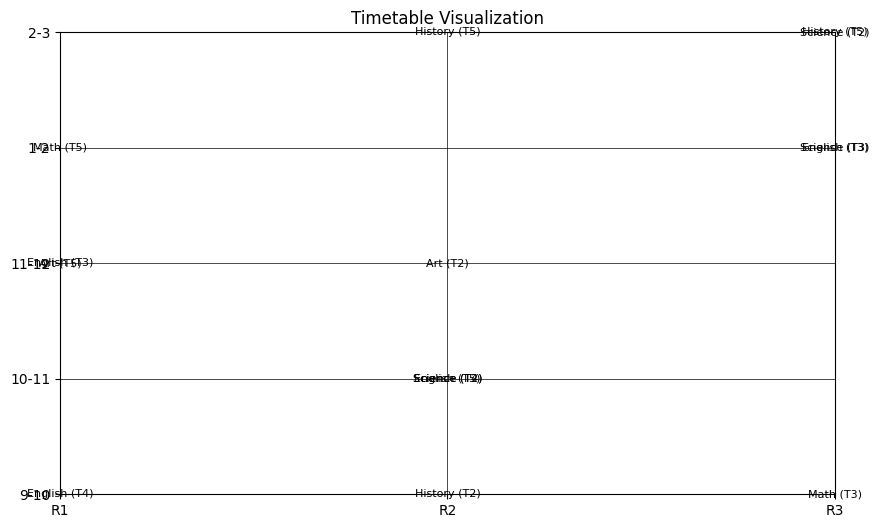

In [47]:
import matplotlib.pyplot as plt

def visualize_timetable(timetable):
    fig, ax = plt.subplots(figsize=(10, 6))
    time_slots = list(timetable.keys())
    rooms = ["R1", "R2", "R3"]  # Customize based on your data

    # Create a grid
    ax.set_xticks(range(len(rooms)))
    ax.set_yticks(range(len(time_slots)))
    ax.set_xticklabels(rooms)
    ax.set_yticklabels(time_slots)
    ax.grid(True, which="both", color="black", linestyle="-", linewidth=0.5)

    # Fill the grid with timetable information
    for i, slot in enumerate(time_slots):
        for j, room in enumerate(rooms):
            # Find class assigned to the room at the current time slot
            for entry in timetable[slot]:
                if entry["room"] == room:
                    ax.text(j, i, f"{entry['class']} ({entry['teacher']})",
                            ha='center', va='center', fontsize=8)

    ax.set_title("Timetable Visualization")
    plt.show()

# Visualize the best timetable
visualize_timetable(best_timetable)


In [48]:
import plotly.figure_factory as ff

def visualize_timetable_interactive(timetable):
    data = []
    for slot, assignments in timetable.items():
        for entry in assignments:
            data.append({
                "Task": entry["class"],
                "Start": slot,
                "Finish": slot,
                "Resource": f"{entry['room']} ({entry['teacher']})"
            })

    fig = ff.create_gantt(data, index_col="Resource", show_colorbar=True, group_tasks=True)
    fig.update_layout(title="Timetable Visualization", xaxis_title="Time Slots", yaxis_title="Rooms")
    fig.show()

# Visualize the best timetable
visualize_timetable_interactive(best_timetable)
